In [73]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

Task 1.1

In [74]:
np.random.seed(0)
NN = 10

In [75]:
G = nx.path_graph(NN)

I_NN = np.eye(NN)

Adj = nx.adjacency_matrix(G)
Adj = Adj.toarray()

In [76]:
AA = np.zeros(shape=(NN, NN))

for ii in range(NN):
    N_ii = np.nonzero(Adj[ii])[0]
    deg_ii = len(N_ii)
    for jj in N_ii:
        deg_jj = len(np.nonzero(Adj[jj])[0])
        AA[ii, jj] = 1 / (1 + max([deg_ii, deg_jj]))

AA += I_NN - np.diag(np.sum(AA, axis=0))

if 0:
    print(np.sum(AA, axis=0))
    print(np.sum(AA, axis=1))

In [77]:
def quadratic_fn(z, q, r):
    return 0.5 * q * z * z + r * z, q * z + r


Q = np.random.uniform(size=(NN))
R = np.random.uniform(size=(NN))

In [78]:
MAXITERS = 1000
# dd = 3

ZZ_gt = np.zeros((MAXITERS, NN))
SS_gt = np.zeros((MAXITERS, NN))
for ii in range(NN):
    _, SS_gt[0, ii] = quadratic_fn(ZZ_gt[0, ii], Q[ii], R[ii])

cost_gt = np.zeros((MAXITERS))

alpha = 1e-2

In [82]:
gradients_norm = []
for kk in range(MAXITERS - 1):

    # gradient tracking
    for ii in range(NN):
        N_ii = np.nonzero(Adj[ii])[0]

        ZZ_gt[kk + 1, ii] += AA[ii, ii] * ZZ_gt[kk, ii]
        SS_gt[kk + 1, ii] += AA[ii, ii] * SS_gt[kk, ii]
        for jj in N_ii:
            ZZ_gt[kk + 1, ii] += AA[ii, jj] * ZZ_gt[kk, jj]
            SS_gt[kk + 1, ii] += AA[ii, jj] * SS_gt[kk, jj]

        ZZ_gt[kk + 1, ii] -= alpha * SS_gt[kk, ii]

        # print(Q[ii])
        _, grad_ell_ii_new = quadratic_fn(ZZ_gt[kk + 1, ii], Q[ii], R[ii])
        _, grad_ell_ii_old = quadratic_fn(ZZ_gt[kk, ii], Q[ii], R[ii])
        SS_gt[kk + 1, ii] += grad_ell_ii_new - grad_ell_ii_old

        gradient_norm = np.linalg.norm(grad_ell_ii_new - grad_ell_ii_old)
        gradients_norm[kk] = gradient_norm

        ell_ii_gt, _ = quadratic_fn(ZZ_gt[kk, ii], Q[ii], R[ii])
        cost_gt[kk] += ell_ii_gt

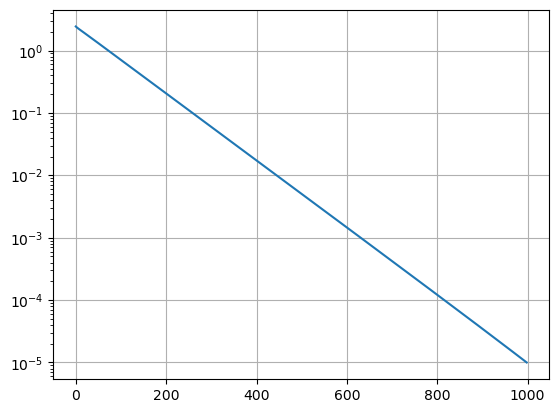

In [80]:
if 0:
    fig, ax = plt.subplots()
    ax.plot(np.arange(MAXITERS), ZZ_gt)
    ax.grid()


ZZ_opt = -np.sum(R) / np.sum(Q)
opt_cost = 0.5 * np.sum(Q) * ZZ_opt**2 + np.sum(R) * ZZ_opt
# print(opt_cost)
# print(cost[-2])
# print(cost_gt[-2])

fig, ax = plt.subplots()
ax.semilogy(np.arange(MAXITERS - 1), np.abs(cost_gt[:-1] - opt_cost))
ax.grid()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (999,) and (9990,)

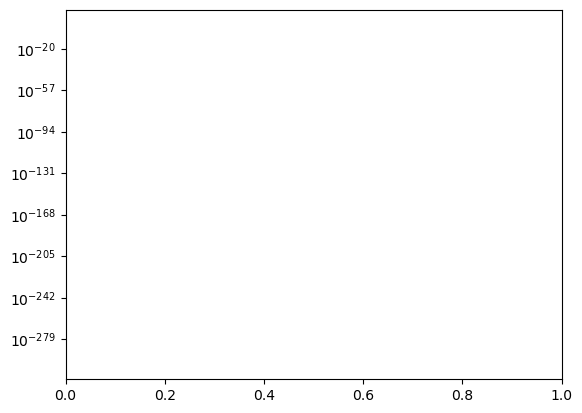

In [83]:
fig, ax = plt.subplots()
ax.semilogy(np.arange(MAXITERS - 1), gradients_norm)
ax.grid()

plt.show()